# ความท้าทาย: วิเคราะห์ข้อความเกี่ยวกับวิทยาศาสตร์ข้อมูล

ในตัวอย่างนี้ เราจะทำแบบฝึกหัดง่ายๆ ที่ครอบคลุมทุกขั้นตอนของกระบวนการวิทยาศาสตร์ข้อมูลแบบดั้งเดิม คุณไม่จำเป็นต้องเขียนโค้ดใดๆ เพียงแค่คลิกที่เซลล์ด้านล่างเพื่อรันและสังเกตผลลัพธ์ ในฐานะความท้าทาย คุณสามารถลองใช้โค้ดนี้กับข้อมูลที่แตกต่างกันได้

## เป้าหมาย

ในบทเรียนนี้ เราได้พูดคุยเกี่ยวกับแนวคิดต่างๆ ที่เกี่ยวข้องกับวิทยาศาสตร์ข้อมูล ลองมาค้นหาแนวคิดที่เกี่ยวข้องเพิ่มเติมโดยการทำ **การขุดข้อความ** กัน เราจะเริ่มต้นด้วยข้อความเกี่ยวกับวิทยาศาสตร์ข้อมูล ดึงคำสำคัญออกมา และพยายามแสดงผลลัพธ์ในรูปแบบภาพ

สำหรับข้อความ เราจะใช้หน้าที่เกี่ยวกับวิทยาศาสตร์ข้อมูลจาก Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## ขั้นตอนที่ 1: การดึงข้อมูล

ขั้นตอนแรกในกระบวนการวิทยาศาสตร์ข้อมูลคือการดึงข้อมูล เราจะใช้ไลบรารี `requests` เพื่อทำสิ่งนี้:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## ขั้นตอนที่ 2: การแปลงข้อมูล

ขั้นตอนถัดไปคือการแปลงข้อมูลให้อยู่ในรูปแบบที่เหมาะสมสำหรับการประมวลผล ในกรณีนี้ เราได้ดาวน์โหลดซอร์สโค้ด HTML จากหน้าเว็บมาแล้ว และเราจำเป็นต้องแปลงมันให้เป็นข้อความธรรมดา

มีหลายวิธีที่สามารถทำได้ เราจะใช้ [HTMLParser](https://docs.python.org/3/library/html.parser.html) ซึ่งเป็นออบเจ็กต์ที่มีอยู่ใน Python อยู่แล้ว วิธีนี้ง่ายที่สุด เราจำเป็นต้องสร้างคลาสย่อยจากคลาส `HTMLParser` และกำหนดโค้ดที่จะรวบรวมข้อความทั้งหมดที่อยู่ภายในแท็ก HTML ยกเว้นแท็ก `<script>` และ `<style>`


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## ขั้นตอนที่ 3: การวิเคราะห์ข้อมูลเชิงลึก

ขั้นตอนที่สำคัญที่สุดคือการเปลี่ยนข้อมูลของเราให้อยู่ในรูปแบบที่สามารถนำไปวิเคราะห์เพื่อให้ได้ข้อมูลเชิงลึกได้ ในกรณีนี้ เราต้องการดึงคำสำคัญจากข้อความ และดูว่าคำสำคัญใดมีความหมายมากที่สุด

เราจะใช้ไลบรารี Python ที่เรียกว่า [RAKE](https://github.com/aneesha/RAKE) สำหรับการดึงคำสำคัญ ก่อนอื่นให้ติดตั้งไลบรารีนี้ในกรณีที่ยังไม่มี:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


ฟังก์ชันหลักสามารถใช้งานได้จากวัตถุ `Rake` ซึ่งเราสามารถปรับแต่งได้โดยใช้พารามิเตอร์บางตัว ในกรณีของเรา เราจะกำหนดความยาวขั้นต่ำของคีย์เวิร์ดไว้ที่ 5 ตัวอักษร ความถี่ขั้นต่ำของคีย์เวิร์ดในเอกสารไว้ที่ 3 และจำนวนคำสูงสุดในคีย์เวิร์ดไว้ที่ 2 คุณสามารถทดลองปรับค่าอื่นๆ และสังเกตผลลัพธ์ได้ตามต้องการ


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

เราได้รายการคำศัพท์พร้อมกับระดับความสำคัญที่เกี่ยวข้องมาแล้ว ดังที่คุณเห็น สาขาที่เกี่ยวข้องมากที่สุด เช่น การเรียนรู้ของเครื่องและบิ๊กดาต้า อยู่ในตำแหน่งบนสุดของรายการ

## ขั้นตอนที่ 4: การแสดงผลลัพธ์ในรูปแบบภาพ

ผู้คนสามารถตีความข้อมูลได้ดีที่สุดเมื่ออยู่ในรูปแบบภาพ ดังนั้นจึงมักมีเหตุผลที่จะนำข้อมูลมาแสดงในรูปแบบภาพเพื่อดึงข้อมูลเชิงลึกบางอย่างออกมา เราสามารถใช้ไลบรารี `matplotlib` ใน Python เพื่อสร้างกราฟแสดงการกระจายตัวของคำสำคัญพร้อมกับความเกี่ยวข้องของพวกมัน:


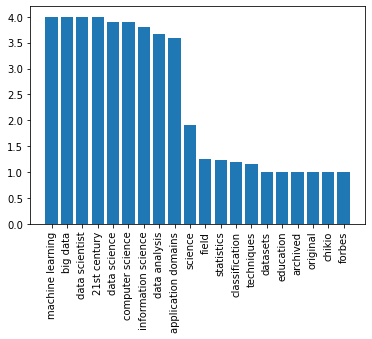

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

อย่างไรก็ตาม ยังมีวิธีที่ดีกว่าในการแสดงความถี่ของคำ - โดยใช้ **Word Cloud** เราจะต้องติดตั้งไลบรารีอีกตัวเพื่อสร้าง Word Cloud จากรายการคำสำคัญของเรา


In [71]:
!{sys.executable} -m pip install wordcloud

วัตถุ `WordCloud` มีหน้าที่รับข้อความต้นฉบับหรือรายการคำที่คำนวณความถี่ไว้ล่วงหน้า และส่งคืนภาพซึ่งสามารถแสดงผลได้โดยใช้ `matplotlib`:


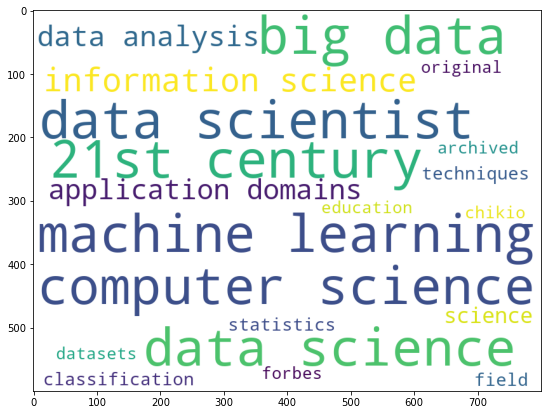

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

เรายังสามารถส่งข้อความต้นฉบับไปที่ `WordCloud` - มาดูกันว่าเราสามารถได้ผลลัพธ์ที่คล้ายกันหรือไม่:


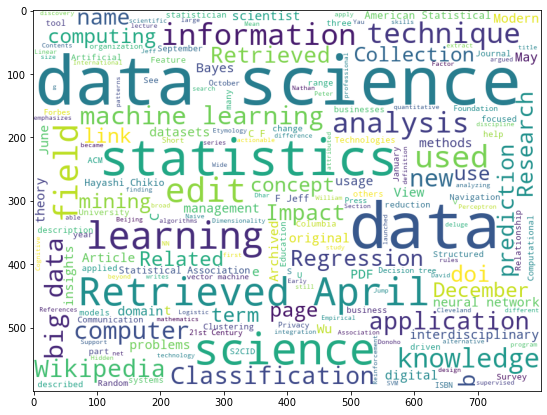

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

คุณสามารถเห็นได้ว่า Word Cloud ตอนนี้ดูน่าประทับใจมากขึ้น แต่ก็ยังมีเสียงรบกวนอยู่มาก (เช่น คำที่ไม่เกี่ยวข้องอย่าง `Retrieved on`) นอกจากนี้ เรายังได้คีย์เวิร์ดที่มีสองคำ เช่น *data scientist* หรือ *computer science* น้อยลงอีกด้วย สาเหตุเป็นเพราะอัลกอริทึม RAKE ทำงานได้ดีกว่าในการเลือกคีย์เวิร์ดที่เหมาะสมจากข้อความ ตัวอย่างนี้แสดงให้เห็นถึงความสำคัญของการเตรียมข้อมูลและการทำความสะอาดข้อมูล เพราะภาพที่ชัดเจนในตอนท้ายจะช่วยให้เราตัดสินใจได้ดีขึ้น

ในแบบฝึกหัดนี้ เราได้ผ่านกระบวนการง่าย ๆ ในการดึงความหมายบางอย่างจากข้อความใน Wikipedia ในรูปแบบของคีย์เวิร์ดและ Word Cloud ตัวอย่างนี้ค่อนข้างง่าย แต่ก็แสดงให้เห็นถึงขั้นตอนทั่วไปทั้งหมดที่นักวิทยาศาสตร์ข้อมูลจะทำเมื่อทำงานกับข้อมูล ตั้งแต่การได้มาซึ่งข้อมูลไปจนถึงการสร้างภาพข้อมูล

ในคอร์สของเรา เราจะพูดถึงทุกขั้นตอนเหล่านี้อย่างละเอียด



---

**ข้อจำกัดความรับผิดชอบ**:  
เอกสารนี้ได้รับการแปลโดยใช้บริการแปลภาษา AI [Co-op Translator](https://github.com/Azure/co-op-translator) แม้ว่าเราจะพยายามให้การแปลมีความถูกต้อง แต่โปรดทราบว่าการแปลอัตโนมัติอาจมีข้อผิดพลาดหรือความไม่แม่นยำ เอกสารต้นฉบับในภาษาต้นทางควรถือเป็นแหล่งข้อมูลที่เชื่อถือได้ สำหรับข้อมูลที่สำคัญ ขอแนะนำให้ใช้บริการแปลภาษามนุษย์มืออาชีพ เราจะไม่รับผิดชอบต่อความเข้าใจผิดหรือการตีความที่ผิดพลาดซึ่งเกิดจากการใช้การแปลนี้
